In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# show live results
tf.enable_eager_execution()

In [3]:
# download two test images
content_path = tf.keras.utils.get_file('olin.jpg','https://github.com/Inkering/ML-Project-1/raw/master/71934026_761426527628858_7267766954746707968_n.png')
style_path = tf.keras.utils.get_file('painting.jpg','https://github.com/Inkering/ML-Project-1/raw/master/StarryNight.jpg')

In [4]:
def transform_image(img_path, dim):
    # load the image into a variable
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
 
    # look at size of the image, get the longest dimension
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    
    # calculate a scale factor to fit to the desired dims
    scale = dim / long_dim

    # calculate the new dimensions
    new_shape = tf.cast(shape * scale, tf.int32)
    
    # resize the image vector
    img = tf.image.resize(img, new_shape)
    
    # what does this do?
    img = img[tf.newaxis, :]
    
    return img

In [11]:
# quick function for plotting an image, gets rid of num_frames?
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    
    plt.imshow(image)
    if title:
        plt.title(title)

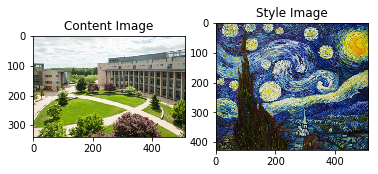

In [12]:
# scale images 
content_image = transform_image(content_path, 512)
style_image = transform_image(style_path, 512)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [26]:
# input post-scaled image into vgg model, normalize
# input to how the model was trained
x = tf.keras.applications.vgg19.preprocess_input(content_image*200)


## Keras Docs
https://keras.io/applications/#vgg19

## ImageNets Docs
http://image-net.org/explore.php

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


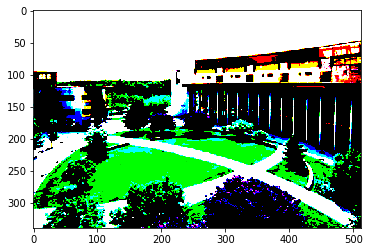

In [27]:
# look at normalized image to the model set,
#(according to keras)
imshow(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


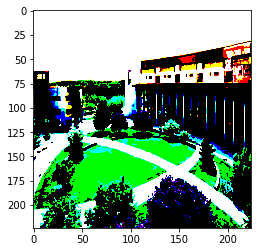

In [29]:
# resize input into a square
x = tf.image.resize(x, (224, 224))
imshow(x)

In [30]:
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')

574717952/574710816 [==============================] - 250s 0us/step


TensorShape([Dimension(1), Dimension(1000)])

In [33]:
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([Dimension(1), Dimension(1000)])

In [36]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('palace', 0.27103126),
 ('monastery', 0.121630244),
 ('patio', 0.0721746),
 ('mosque', 0.065551676),
 ('sundial', 0.033055462)]